In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-21 11:50:06.526100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone13_I(ii) dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_(iii)/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0078125+0.j        0.015625 -0.0078125j 0.015625 +0.015625j  ...
 0.0078125+0.015625j  0.015625 -0.0078125j 0.0234375+0.j       ]
2048
80972
(2048, 80972)
[0.01880924 0.00981325 0.00367837 ... 0.00182399 0.00400141 0.00982514]
0
(10000, 2048)
(10000,)
[0.015625 +0.015625j  0.0234375+0.j        0.015625 +0.0078125j ...
 0.015625 -0.0078125j 0.0234375+0.0078125j 0.015625 +0.0078125j]
2048
76655
(2048, 76655)
[0.01861852 0.00976308 0.00390186 ... 0.00166154 0.00340372 0.00974781]
1
(20000, 2048)
(20000,)
[0.0234375+0.j        0.015625 +0.015625j  0.015625 +0.0078125j ...
 0.0234375+0.j        0.0234375+0.j        0.015625 +0.0078125j]
2048
79607
(2048, 79607)
[0.01836303 0.00984234 0.00339005 ... 0.00192302 0.00387786 0.00964942]
2
(30000, 2048)
(30000,)
[0.0078125+0.j        0.015625 +0.j        0.0234375+0.015625j  ...
 0.       +0.0078125j 0.015625 -0.0078125j 0.0078125+0.j       ]
2048
84264
(2048, 84264)
[0.01883226 0.00979095 0.00402313 ... 0.00170837 0.00366977 0.00980111]
3
(40

## Cross-model Validation

## iPhone13_I model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5")
model.summary()

2023-02-21 11:58:53.518481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 10.0807 - accuracy: 0.0943
test loss, test acc: [10.08065414428711, 0.09430000185966492]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[   1   21   10 2290    0 7652    1    1   24    0]
 [   3    9    1    0   94 3276    1    2 6614    0]
 [   3  311    0    0  261 6108    2    1 3314    0]
 [   2 7399  216    0   11 2300    3    0   69    0]
 [   2    0    0    1    0 7068    1    4 2924    0]
 [   3    2    0  347    0 9416    1    0  231    0]
 [   2    0    1    4    0 9346    1    1  645    0]
 [   4    3    0 3999    0 5978    3    1   12    0]
 [   3    0    0    6    0    0    0  117    1 9873]
 [   2    7 1880 6603  123 1366    2   16    0    1]]
              precision    recall  f1-score   support

           0       0.04      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.18      0.94      0.30     10000
           6       0.07      0.0

Test Accuracy:0.0943


Text(0.5, 1.0, 'Accuracy:0.094')

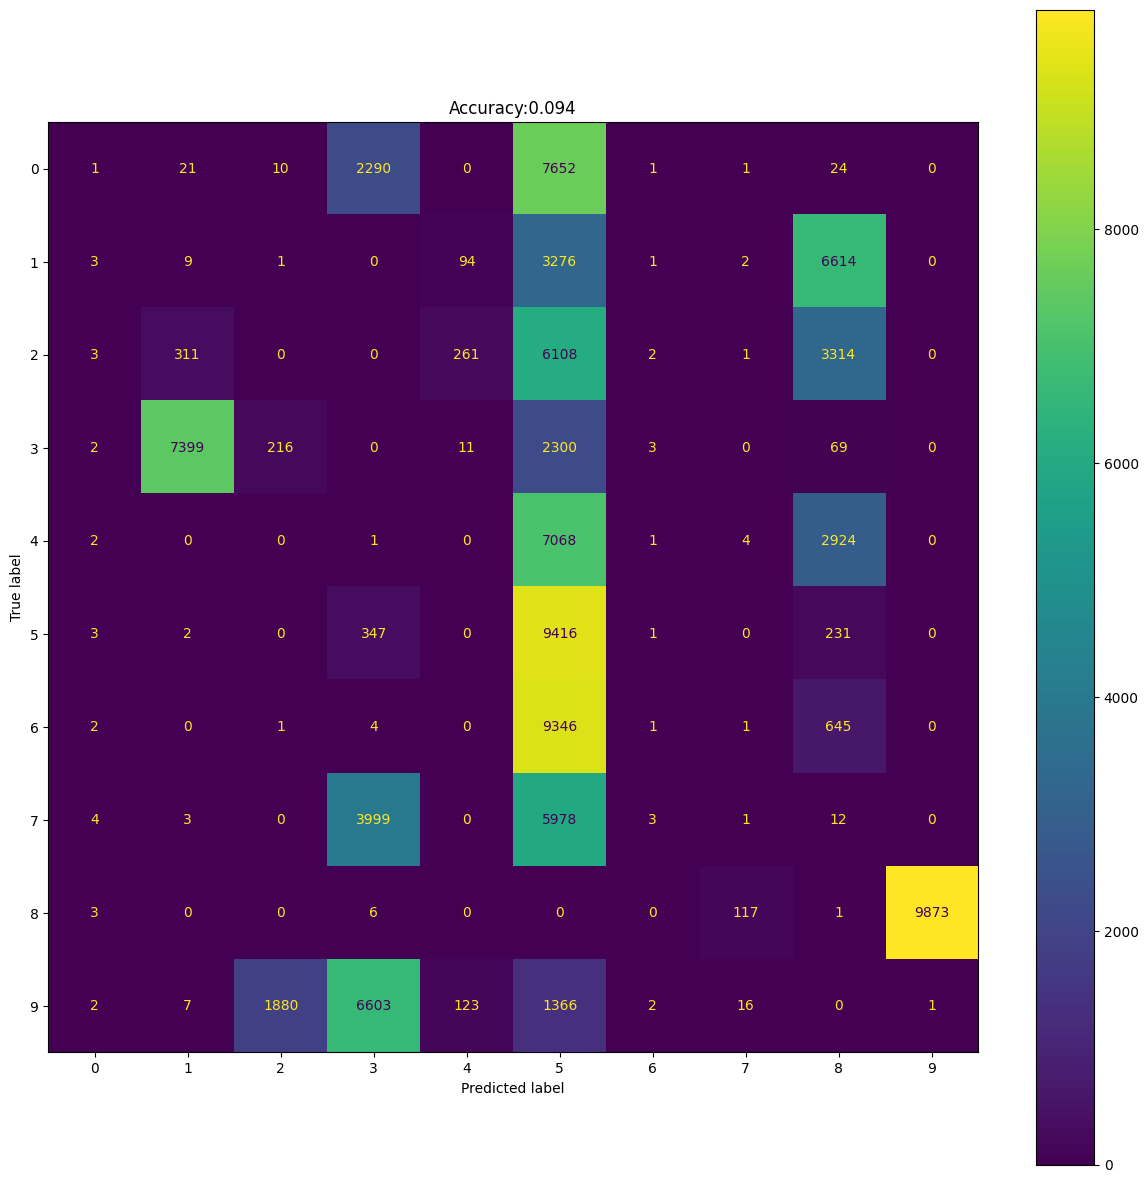

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.9537 - accuracy: 0.4561
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7873 - accuracy: 0.7540
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6798 - accuracy: 0.7926
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6190 - accuracy: 0.8128
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5772 - accuracy: 0.8271
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5458 - accuracy: 0.8358
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5211 - accuracy: 0.8426
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5011 - accuracy: 0.8481
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4843 - accuracy: 0.8531
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

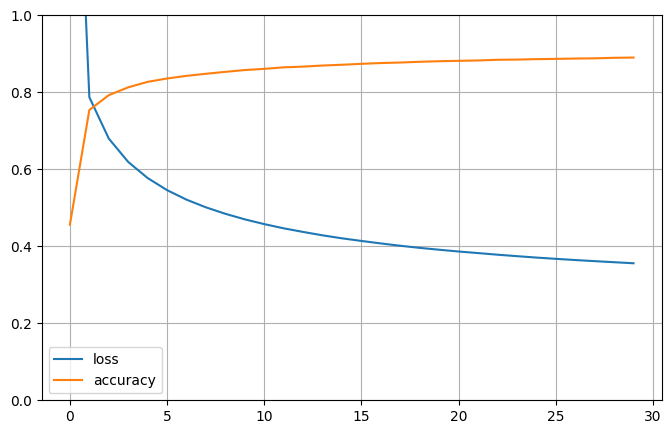

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.3539 - accuracy: 0.8909
test loss, test acc: [0.3539051413536072, 0.8908799886703491]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9509   14   29   37   14  168  203   26    0    0]
 [   8 8060 1137   11  103    0  681    0    0    0]
 [  82 1173 8237  392    2    0  114    0    0    0]
 [  33    0  285 9682    0    0    0    0    0    0]
 [  40   96    1    3 7983 1164  709    1    0    3]
 [ 117    9    1    6  897 8194  604  172    0    0]
 [ 230  544   30    3  747  612 7831    3    0    0]
 [  36    4    2    8    9  268    0 9662    0   11]
 [   0    2    0    0    0    0    0    0 9992    6]
 [   0   17   42    2    0    0    0    1    0 9938]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10000
           1       0.81      0.81      0.81     10000
           2       0.84      0.82      0.83     10000
           3       0.95      0.97      0.96     10000
           4       0.82      0.80      0.81     10000
           5       0.79      0.82      0.80     10000
           6       0.77      0.7

Test Accuracy:0.89088


Text(0.5, 1.0, 'Accuracy:0.891')

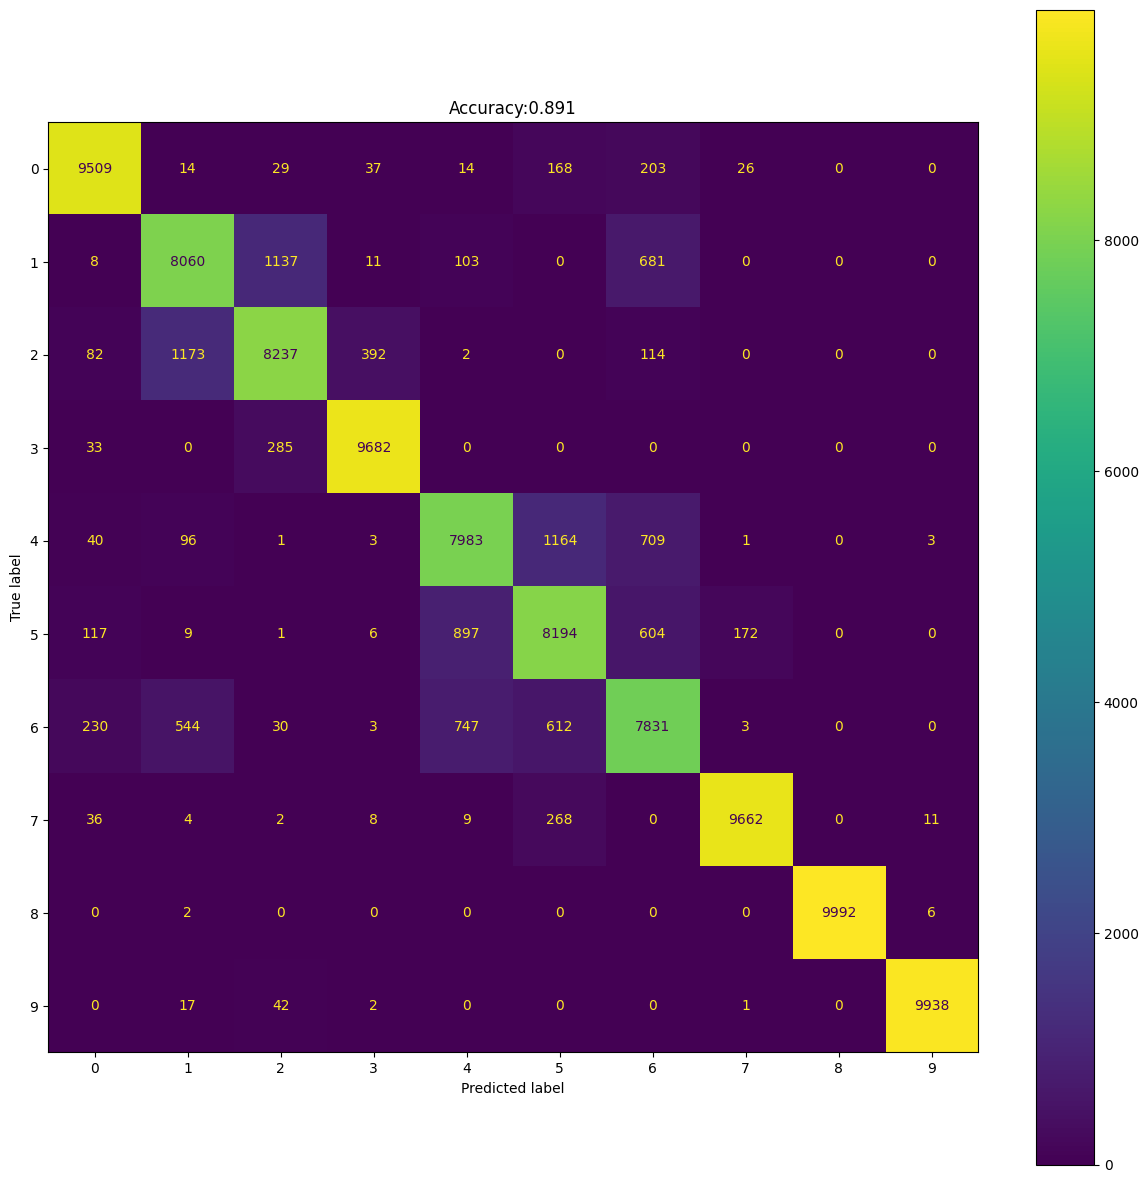

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(ii) model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 6.0436 - accuracy: 0.2478
test loss, test acc: [6.043646335601807, 0.24775999784469604]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[   0   55    2    1  261 9217  107  284    0   73]
 [   2  959   67   16 5112  801  108 2931    0    4]
 [   0 3056   14    1 6234  348   14  310    0   23]
 [   0 3190    0    4 5216  212    1    4    0 1373]
 [   1  445 1000    1  702  613  168 5728 1340    2]
 [   1   65   11    1  188 7081  754 1359  535    5]
 [   1   15    0    1  186 6253 1075 2417   50    2]
 [   3    9    1    0    0 9352  628    3    0    4]
 [  30    4   93   10    0   10   45    7 9801    0]
 [   1   96    9   29    0 4720    6    2    0 5137]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.12      0.10      0.11     10000
           2       0.01      0.00      0.00     10000
           3       0.06      0.00      0.00     10000
           4       0.04      0.07      0.05     10000
           5       0.18      0.71      0.29     10000
           6       0.37      0.1

Test Accuracy:0.24776


Text(0.5, 1.0, 'Accuracy:0.248')

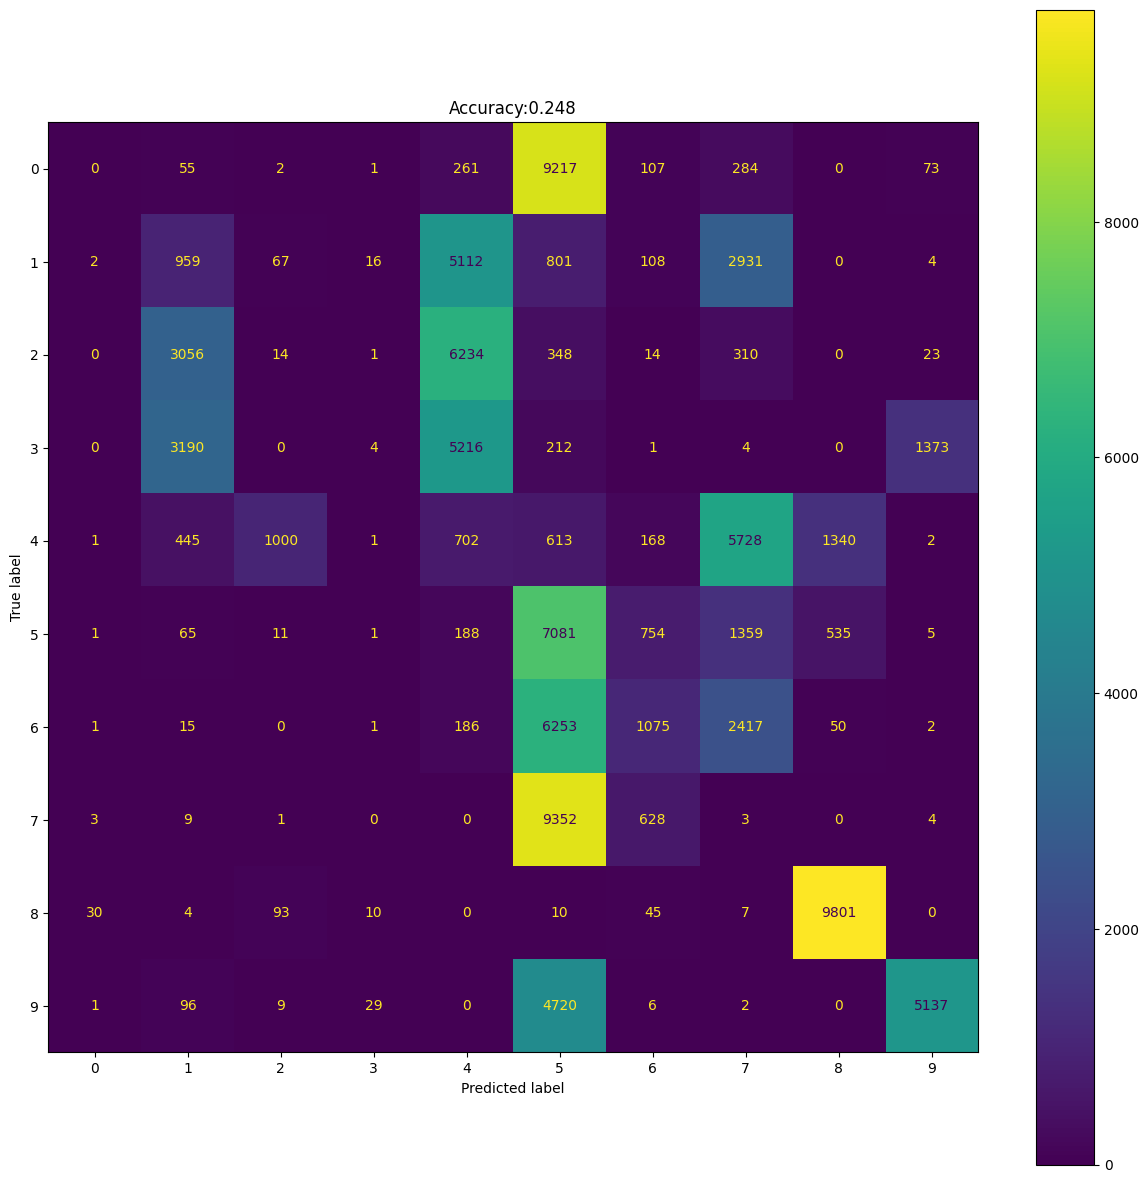

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.3940 - accuracy: 0.5666
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8140 - accuracy: 0.7261
Epoch 3/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7195 - accuracy: 0.7606
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6674 - accuracy: 0.7801
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6330 - accuracy: 0.7940
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6085 - accuracy: 0.8045
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5894 - accuracy: 0.8109
Epoch 8/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5741 - accuracy: 0.8176
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5613 - accuracy: 0.8212
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

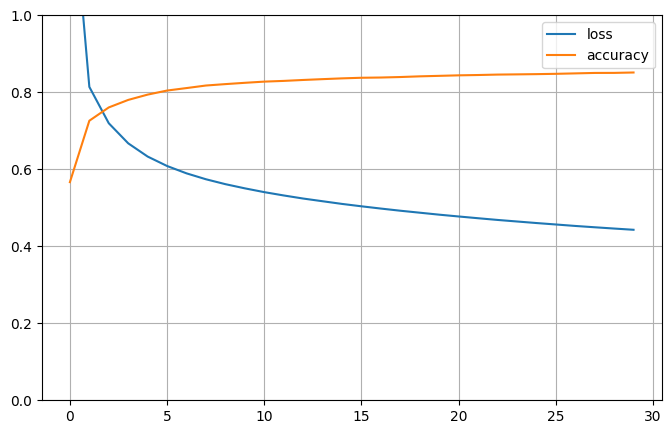

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.4401 - accuracy: 0.8527
test loss, test acc: [0.44008907675743103, 0.8527200222015381]


In [22]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[8776  137   80   40    4  383  454   90    0   36]
 [ 220 6880 1867   19  463   64  485    0    0    2]
 [ 154 1695 7333  762   17    1   35    0    0    3]
 [  36    4  765 9177    0    0    0    0    0   18]
 [   5  395   18    3 8678  547  279    0   73    2]
 [ 424  124   16    3  632 7519 1166   72   40    4]
 [ 585  269   20    2  298 1349 7428   42    5    2]
 [  57    1    4    4    1  121    8 9781    1   22]
 [   2    1   37    1   82    3    0   21 9848    5]
 [   0    2   64   57    3    0    0   22    0 9852]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     10000
           1       0.72      0.69      0.71     10000
           2       0.72      0.73      0.73     10000
           3       0.91      0.92      0.91     10000
           4       0.85      0.87      0.86     10000
           5       0.75      0.75      0.75     10000
           6       0.75      0.7

Test Accuracy:0.85272


Text(0.5, 1.0, 'Accuracy:0.853')

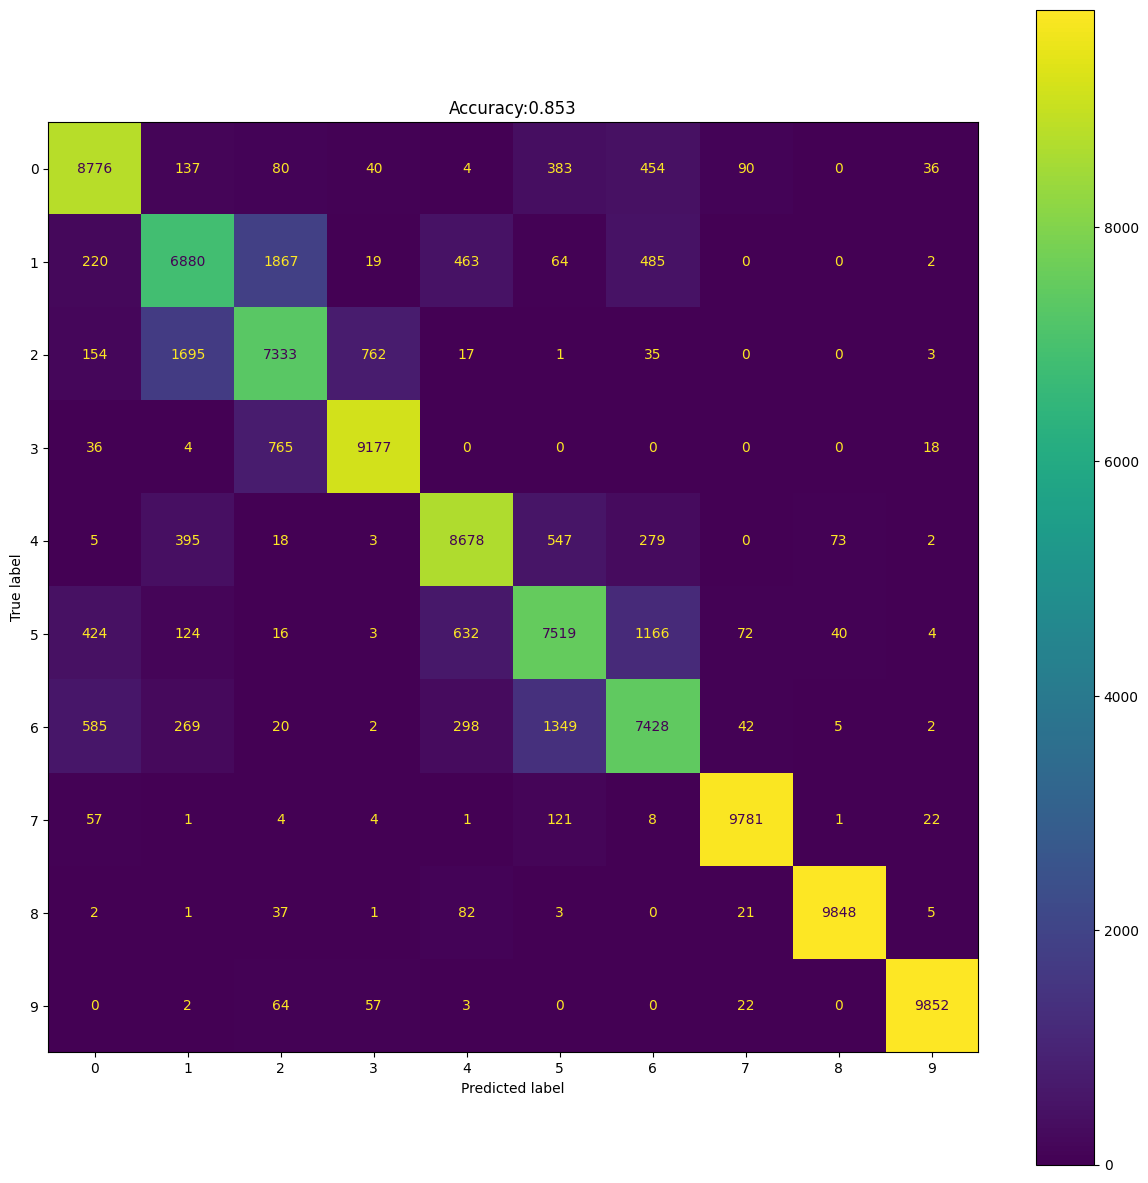

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_Besh model

Cross-model Validation without training

In [24]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [25]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 21.8643 - accuracy: 0.0035
test loss, test acc: [21.86431312561035, 0.0035200000274926424]


In [26]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[   0    2  403    0    0    1    1 6566    0 3027]
 [   0    0  753    0    3    2    2 9165    1   74]
 [   1    2    0    0   12    1    3 9066    1  914]
 [   1 2517    0    0 3454    2    2 1434    1 2589]
 [   1    1 9286    0    1    0    1  709    0    1]
 [   1    0 9956    0    0    2    2   37    0    2]
 [   0    1 6832    0    1    1    0 3125    1   39]
 [   0    4 9626    0    0    1    2   12    0  355]
 [  67    0   10 9895    0    2    0   26    0    0]
 [7588 2057    1    0    0    2    4   11    0  337]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.14      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.00352


Text(0.5, 1.0, 'Accuracy:0.004')

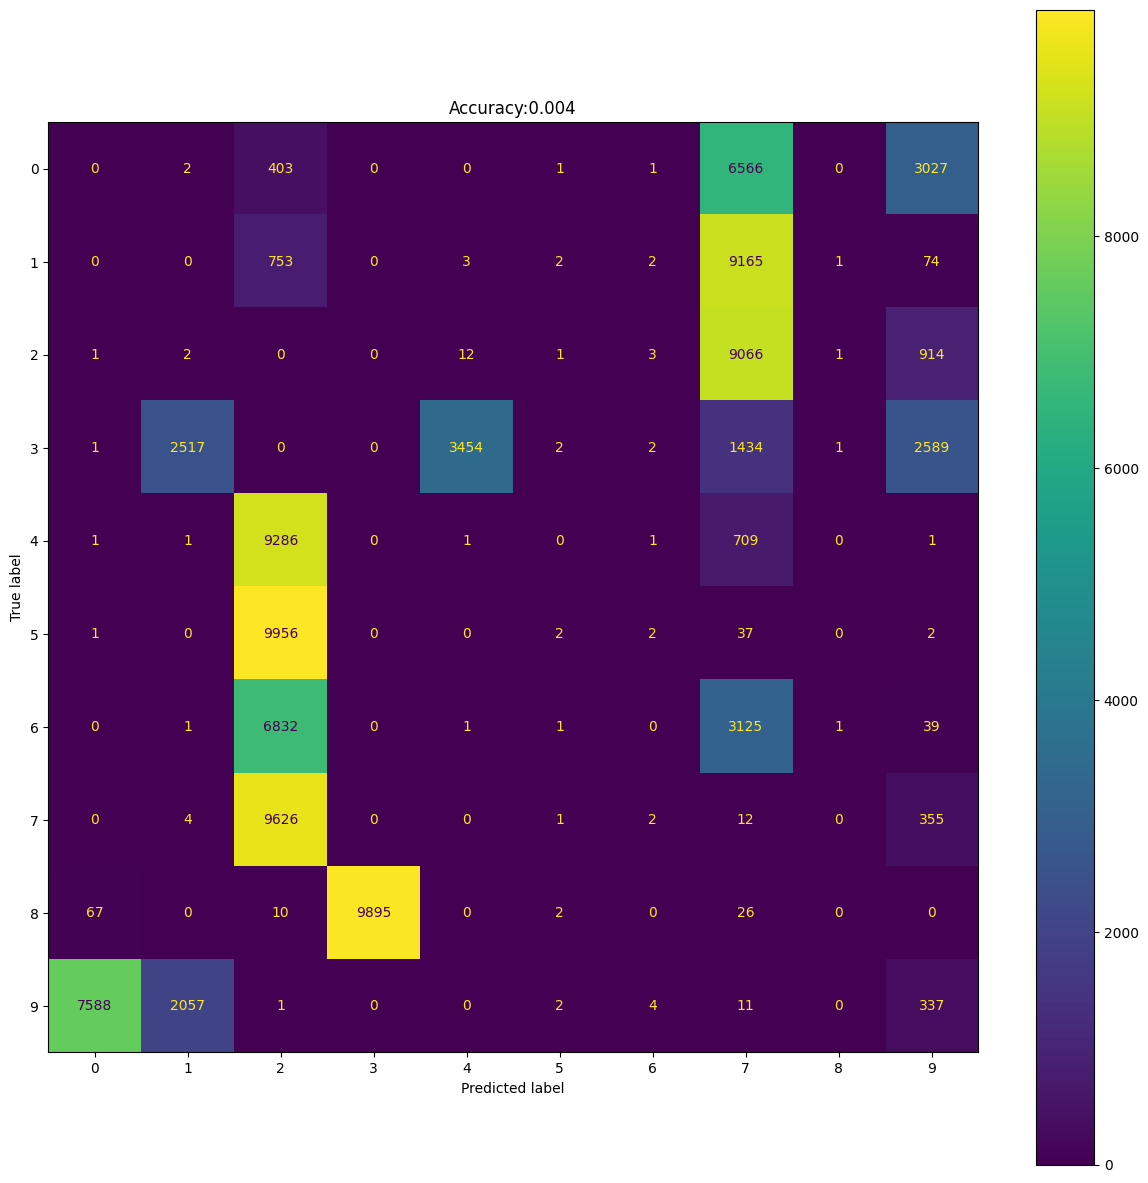

In [27]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [28]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [29]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.9748 - accuracy: 0.4877
Epoch 2/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7610 - accuracy: 0.7631
Epoch 3/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6473 - accuracy: 0.8041
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5931 - accuracy: 0.8206
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5590 - accuracy: 0.8301
Epoch 6/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5354 - accuracy: 0.8366
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5170 - accuracy: 0.8413
Epoch 8/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5020 - accuracy: 0.8448
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4893 - accuracy: 0.8490
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

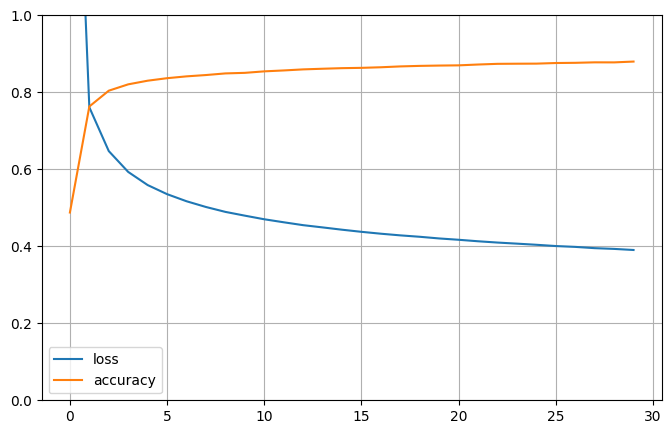

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [31]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.3951 - accuracy: 0.8781
test loss, test acc: [0.3950551450252533, 0.8780999779701233]


In [32]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9323  178  166   12   20    8  285    5    0    3]
 [ 761 7676  864    8   94    9  585    1    0    2]
 [ 220  505 9072  201    0    0    0    0    0    2]
 [   0    0  473 9523    0    0    0    0    0    4]
 [  87    4    0    3 8607 1052  244    1    0    2]
 [  66    0    2    2 1162 8102  386  276    0    4]
 [1125  750   11    4 1101 1072 5869   68    0    0]
 [  24    1    0    4    7  179    4 9778    0    3]
 [   1    0    1    2   76    0    0    0 9913    7]
 [   0    2    5   42    4    0    0    0    0 9947]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10000
           1       0.84      0.77      0.80     10000
           2       0.86      0.91      0.88     10000
           3       0.97      0.95      0.96     10000
           4       0.78      0.86      0.82     10000
           5       0.78      0.81      0.79     10000
           6       0.80      0.5

Test Accuracy:0.8781


Text(0.5, 1.0, 'Accuracy:0.878')

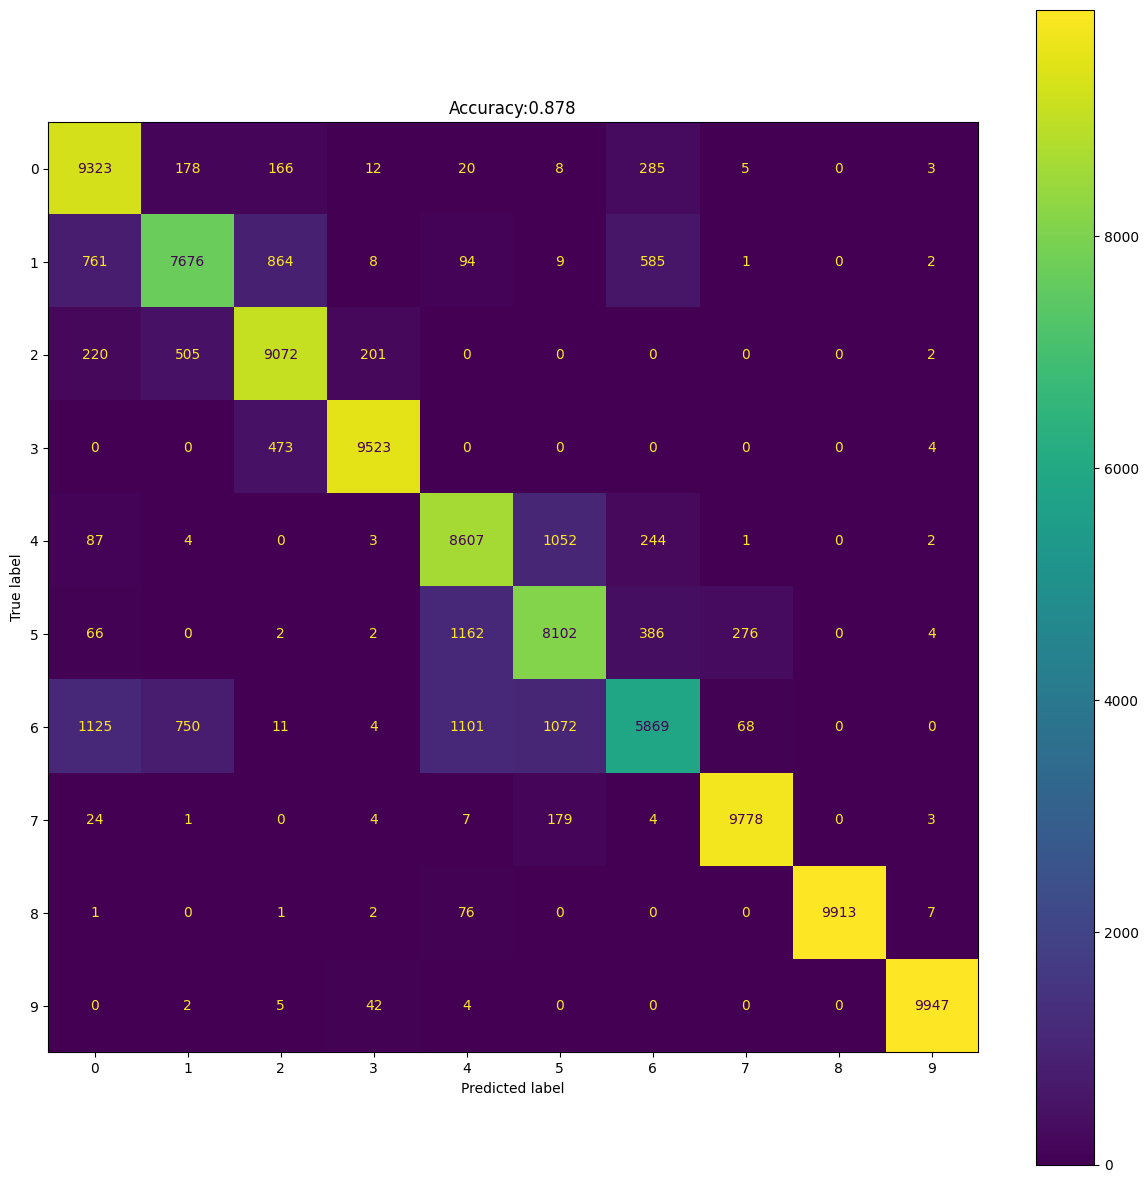

In [33]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data1 model

Cross-model Validation without training

In [34]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [35]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 4.9741 - accuracy: 0.3220
test loss, test acc: [4.974094390869141, 0.3220199942588806]


In [36]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[   1 1107    0    3    4 1415 2427 2864 1129 1050]
 [   4 3254  253 5799  412    4    1  272    0    1]
 [   5 5578   14 4005    3  167    1  226    0    1]
 [ 671 3816    0  528    0 4903   34   48    0    0]
 [   2   33    4   48 8644    0    2   79 1187    1]
 [   3   20    0    1  249    3    1  282 9437    4]
 [   2 1284   62  226 5695    3   42 1443 1243    0]
 [   4    0    1    0    1    0    0    0 1028 8966]
 [   2    0    0   61   72    0    1    4 9860    0]
 [   3   15    1   80    2   31    2   10    0 9856]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.22      0.33      0.26     10000
           2       0.04      0.00      0.00     10000
           3       0.05      0.05      0.05     10000
           4       0.57      0.86      0.69     10000
           5       0.00      0.00      0.00     10000
           6       0.02      0.0

Test Accuracy:0.32202


Text(0.5, 1.0, 'Accuracy:0.322')

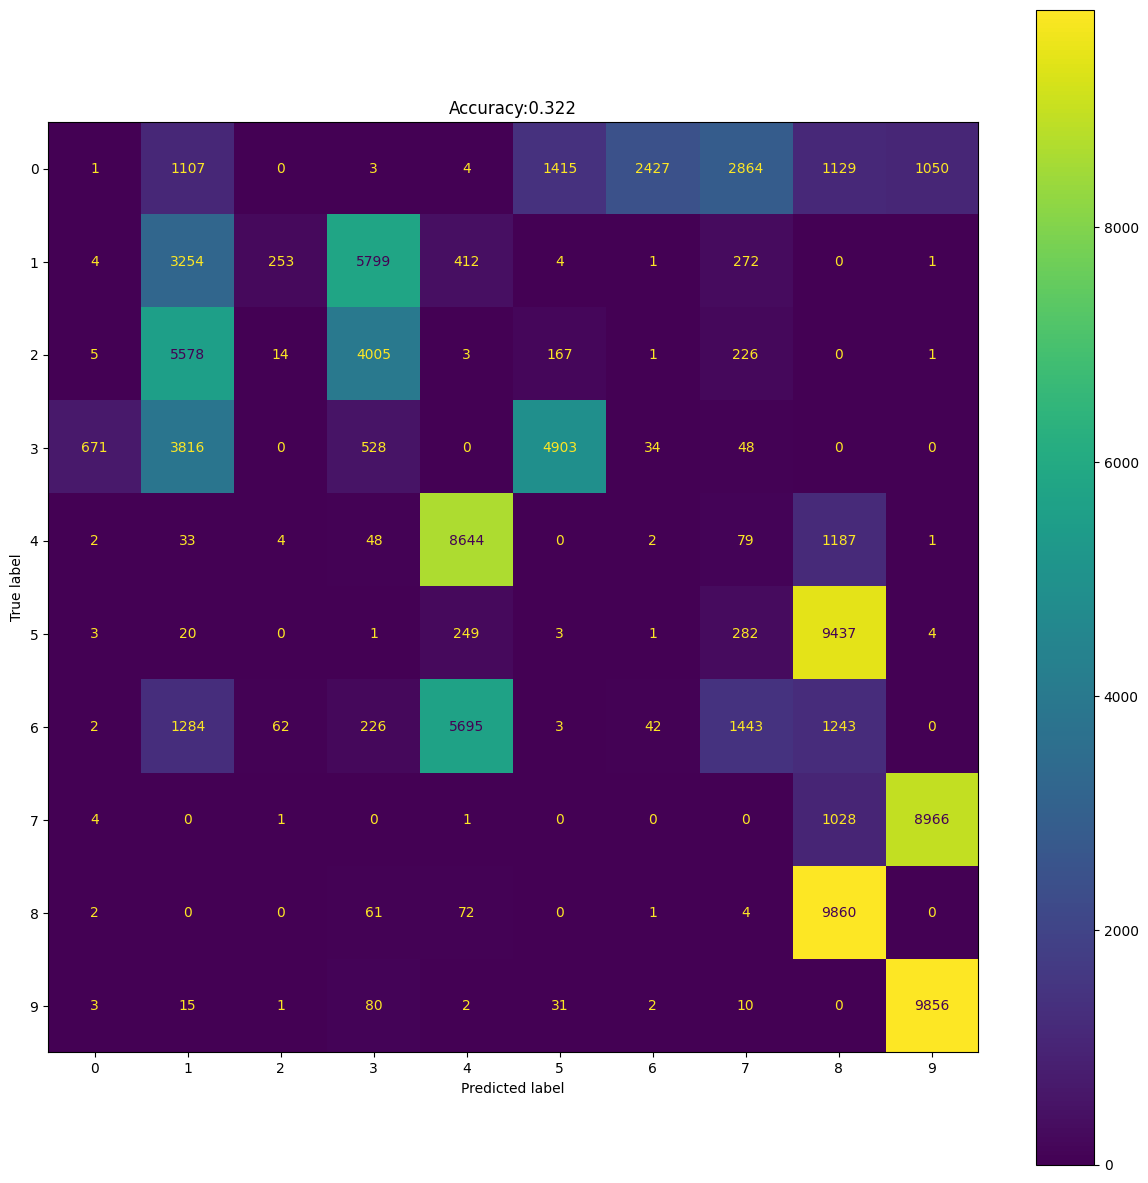

In [37]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [38]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [39]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.1079 - accuracy: 0.6612
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5418 - accuracy: 0.8250
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4691 - accuracy: 0.8513
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4331 - accuracy: 0.8640
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4106 - accuracy: 0.8708
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3946 - accuracy: 0.8765
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3824 - accuracy: 0.8805
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3729 - accuracy: 0.8834
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3652 - accuracy: 0.8858
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

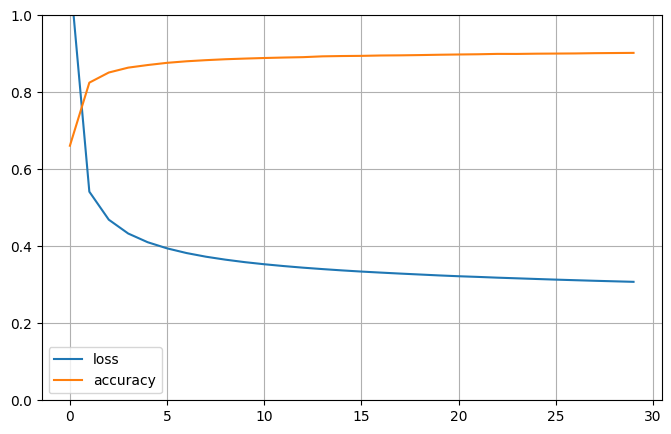

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [41]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.3066 - accuracy: 0.9028
test loss, test acc: [0.306568443775177, 0.9028099775314331]


In [42]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[9538    4   11   16    1  200  160   31    0   39]
 [  26 8000 1493    9   42    1  428    0    0    1]
 [  41 1212 8170  549    0    0   26    0    0    2]
 [  12    0  562 9409    0    0    0    0    0   17]
 [   7   44    0    3 8592  322 1025    1    4    2]
 [ 146    1    0    3  267 9211  331   23   14    4]
 [ 237  346   15    3 1128  377 7892    1    0    1]
 [  18    1    0    2    1   14    0 9825    0  139]
 [   0   63    0    1   69    0    0    4 9861    2]
 [   0    9   43   71    1    0    0   93    0 9783]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10000
           1       0.83      0.80      0.81     10000
           2       0.79      0.82      0.81     10000
           3       0.93      0.94      0.94     10000
           4       0.85      0.86      0.85     10000
           5       0.91      0.92      0.92     10000
           6       0.80      0.7

Test Accuracy:0.90281


Text(0.5, 1.0, 'Accuracy:0.903')

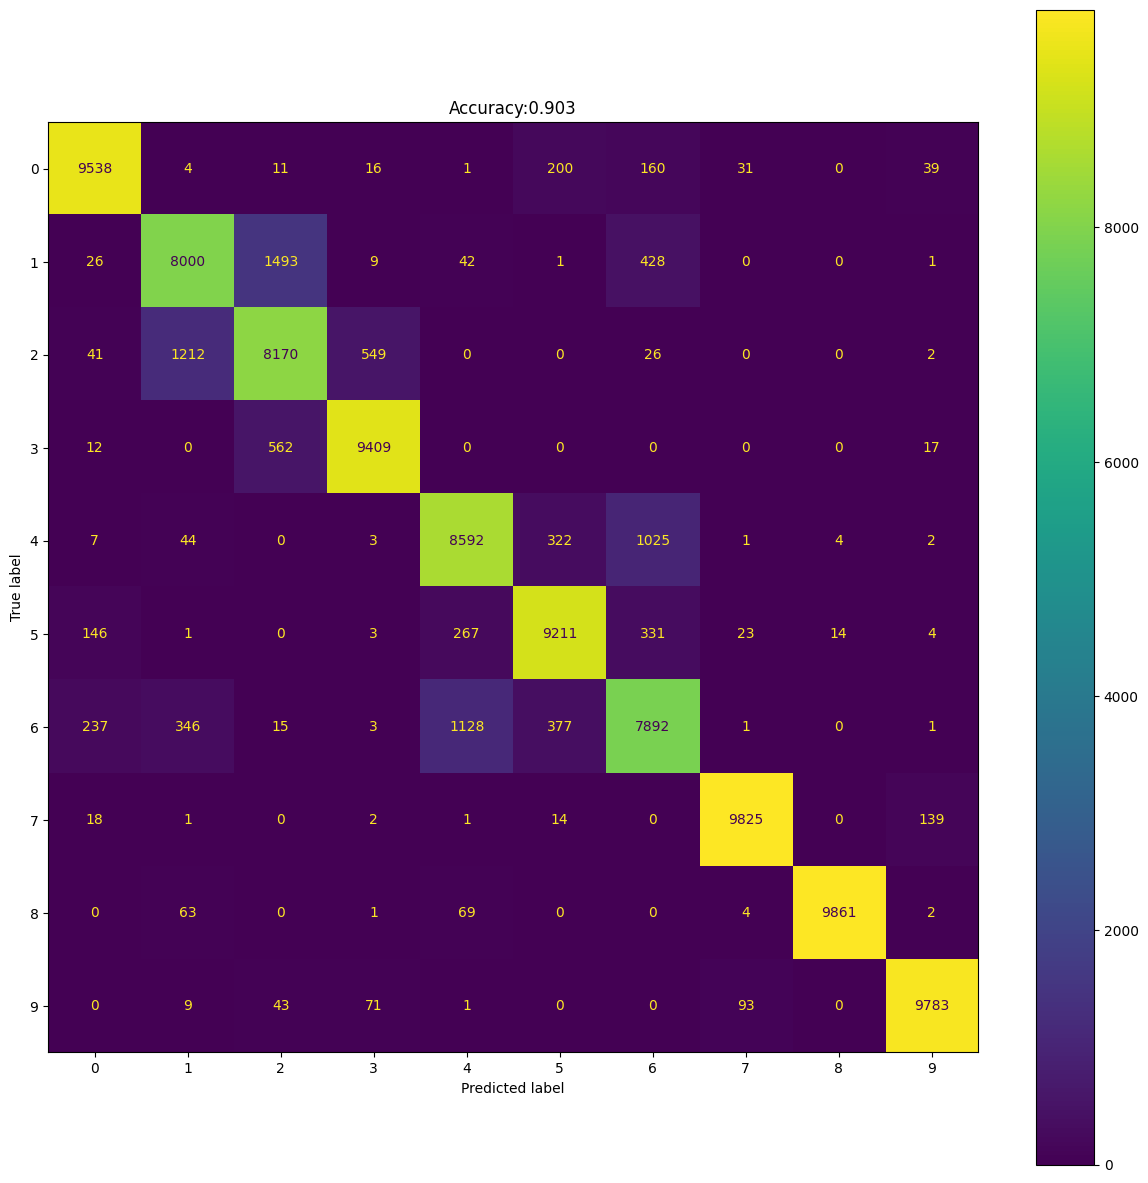

In [43]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data2 model

Cross-model Validation without training

In [44]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [45]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 7.5754 - accuracy: 0.1212
test loss, test acc: [7.575399875640869, 0.12117999792098999]


In [46]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[   2  137 7373    1    0    0  314    1    9 2163]
 [   2 3933 4856    1   11    3 1153    3   11   27]
 [ 106 5922 3375    4   31    5  217    0  302   38]
 [4613 2364 1505  499    7  330    0    0  629   53]
 [   1    1 6447    1    0    1 2907  638    0    4]
 [   2    4 7587    2    0    1 1525    0    0  879]
 [   1  361 5477    1    1    2 4018    2    5  132]
 [   4    2 1469 4746    0    2    1    1    0 3775]
 [   0    0 1543    0    0    3 3251 5166    0   37]
 [  33    6    3 9598   69    0    0    1    1  289]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.31      0.39      0.35     10000
           2       0.09      0.34      0.14     10000
           3       0.03      0.05      0.04     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.30      0.4

Test Accuracy:0.12118


Text(0.5, 1.0, 'Accuracy:0.121')

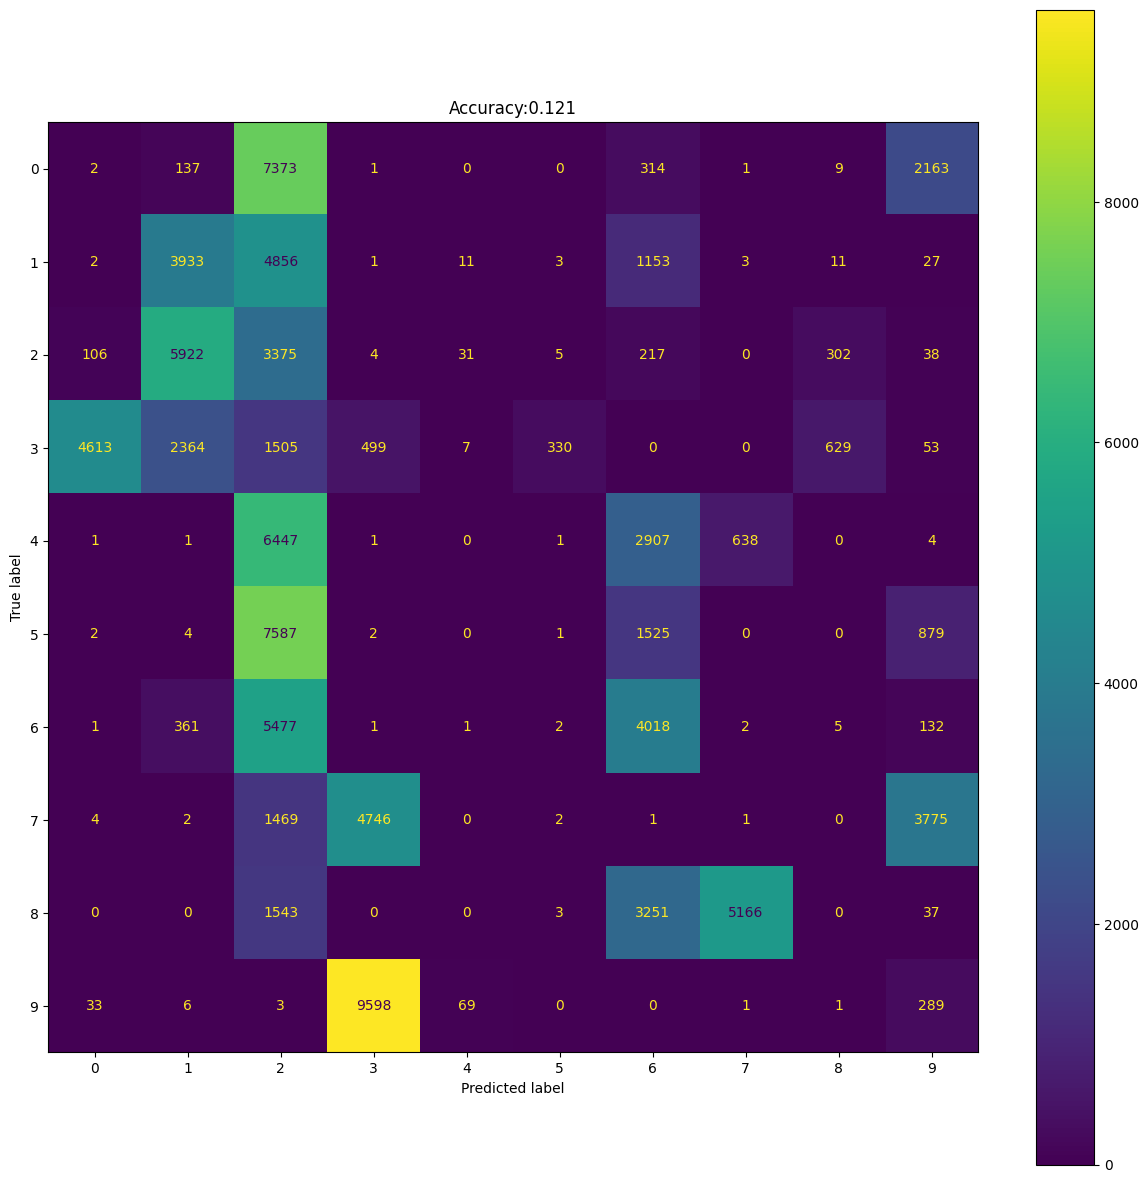

In [47]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [48]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [49]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.8681 - accuracy: 0.4865
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7850 - accuracy: 0.7417
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6675 - accuracy: 0.7799
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6117 - accuracy: 0.7981
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5777 - accuracy: 0.8077
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5538 - accuracy: 0.8149
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5357 - accuracy: 0.8199
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5216 - accuracy: 0.8234
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5098 - accuracy: 0.8271
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

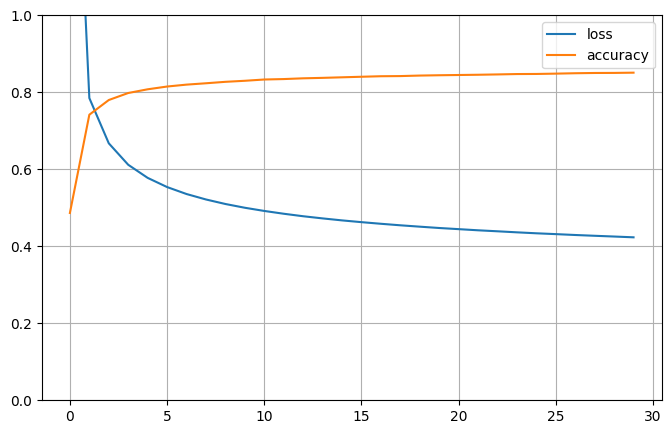

In [50]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [51]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.4218 - accuracy: 0.8517
test loss, test acc: [0.42176344990730286, 0.8516600131988525]


In [52]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[8010  175   52   18   22 1001  716    3    0    3]
 [ 211 6999 1483   30   70    1 1205    0    0    1]
 [ 102 1436 7730  600    0    0  130    0    0    2]
 [  13    2  672 9309    0    0    0    0    0    4]
 [  18   34    0    2 8468  698  768    0   11    1]
 [ 899    4    1    3  672 7964  450    0    4    3]
 [ 687 1172   99    4  680  388 6969    0    0    1]
 [   2    1    0    3    1   19    0 9947    0   27]
 [   0    0    0    2   85    8    0    0 9904    1]
 [   0    1   42   83    3    0    0    5    0 9866]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80     10000
           1       0.71      0.70      0.71     10000
           2       0.77      0.77      0.77     10000
           3       0.93      0.93      0.93     10000
           4       0.85      0.85      0.85     10000
           5       0.79      0.80      0.79     10000
           6       0.68      0.7

Test Accuracy:0.85166


Text(0.5, 1.0, 'Accuracy:0.852')

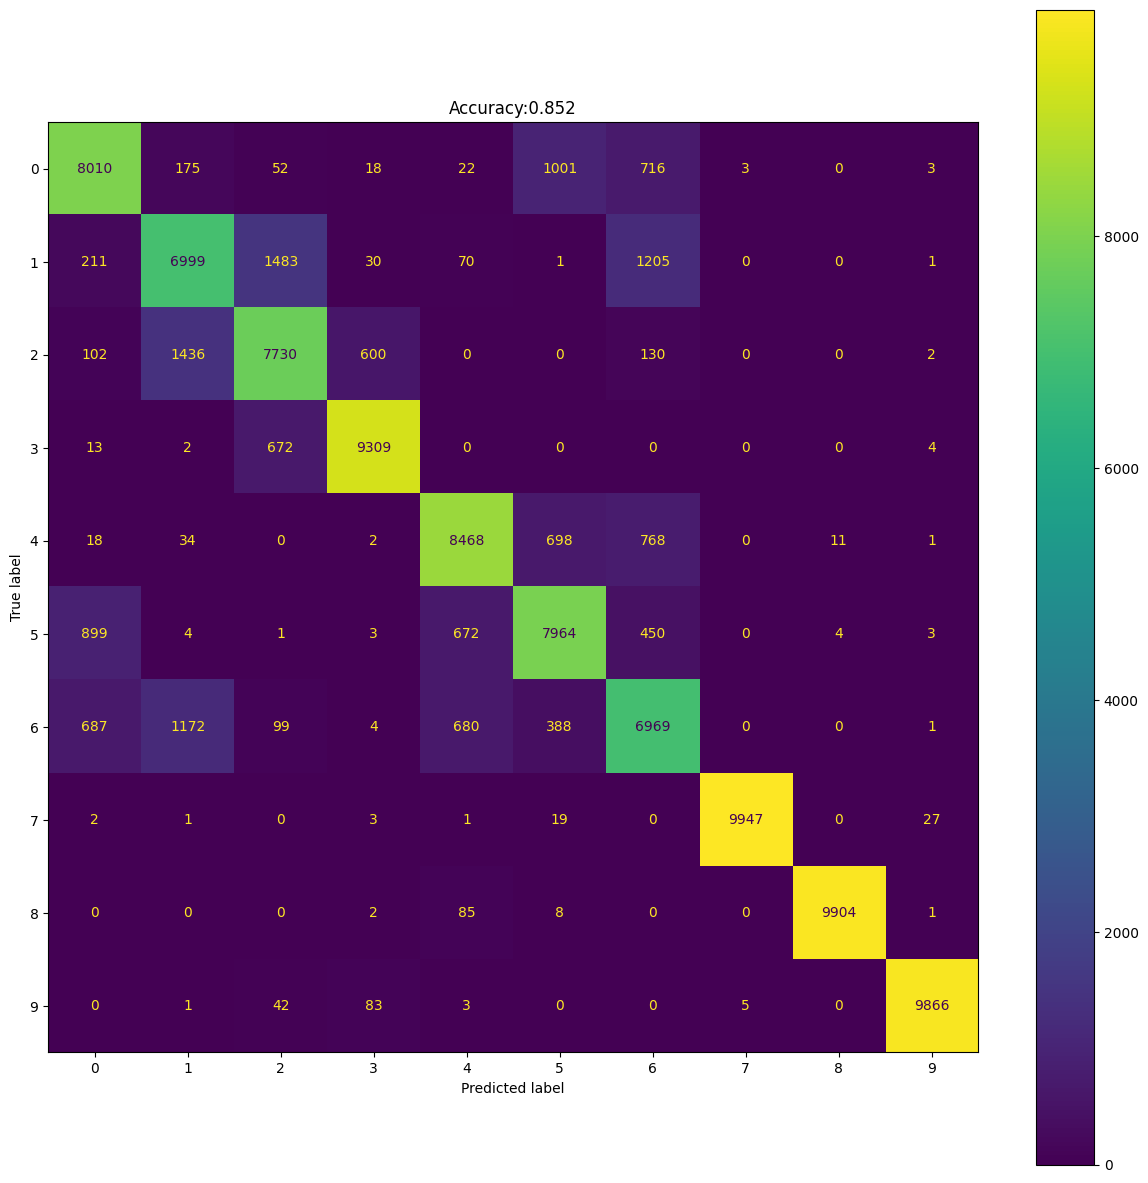

In [53]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_II model

Cross-model Validation without training

In [54]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [55]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 10.5138 - accuracy: 0.0412
test loss, test acc: [10.513806343078613, 0.04115999862551689]


In [56]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[   0    1   46    3    0 9930   17    1    0    2]
 [   0  439    0   81    3 9445    1   14   16    1]
 [   0 2018    0    3    4 7943    1    1   26    4]
 [   0 1143    0    0    4 6486    0    0  696 1671]
 [   0    2 1039    5    2 6659    1 2292    0    0]
 [   0    2 5977    0    0 3670    2  346    0    3]
 [   0    2   63    1    1 8890    1 1041    0    1]
 [   5    0 8855    1    0    2 1136    1    0    0]
 [   8    0 9849  137    0    0    0    6    0    0]
 [  32    0    0   10    1    0 9854    0  100    3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.12      0.04      0.06     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.13      0.00      0.00     10000
           5       0.07      0.37      0.12     10000
           6       0.00      0.0

Test Accuracy:0.04116


Text(0.5, 1.0, 'Accuracy:0.041')

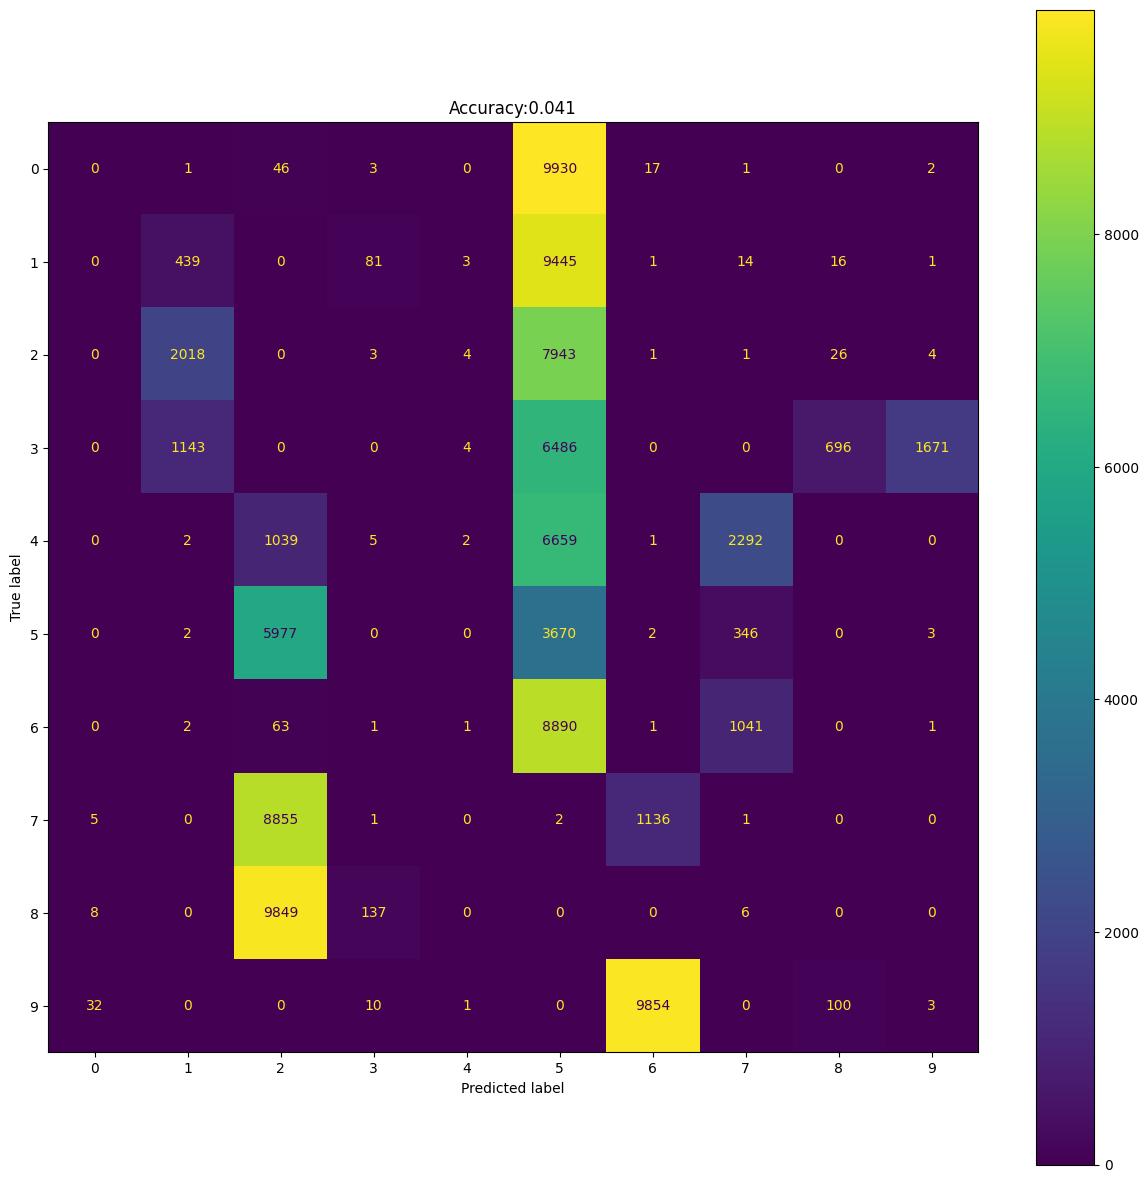

In [57]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [58]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [59]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.7765 - accuracy: 0.5672
Epoch 2/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5765 - accuracy: 0.8522
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4843 - accuracy: 0.8700
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4425 - accuracy: 0.8768
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4171 - accuracy: 0.8814
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3996 - accuracy: 0.8835
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3861 - accuracy: 0.8856
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3756 - accuracy: 0.8871
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3667 - accuracy: 0.8878
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

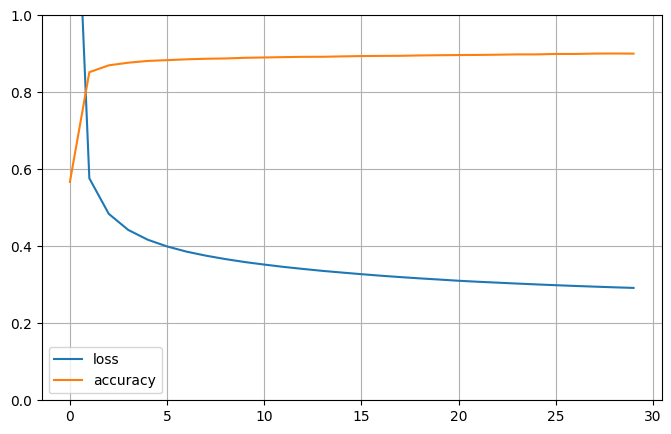

In [60]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [61]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.2908 - accuracy: 0.9008
test loss, test acc: [0.2907573878765106, 0.9008499979972839]


In [62]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 5ms/step
[[9356   41   23   13   10  261  291    3    0    2]
 [  81 8005 1489   11   39    0  371    0    0    4]
 [  43 1125 8047  775    0    0    5    0    0    5]
 [  11    3  758 9224    0    0    0    0    0    4]
 [  33   41    1    1 8536  932  453    0    0    3]
 [ 200    1    1    1  559 8690  537    4    3    4]
 [ 280  212    6    2  407  688 8402    0    1    2]
 [   8    1    0    0    1   11    0 9972    0    7]
 [   0   37   20    0   49    0    0    0 9891    3]
 [   0    3    8   20    0    0    0    7    0 9962]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     10000
           1       0.85      0.80      0.82     10000
           2       0.78      0.80      0.79     10000
           3       0.92      0.92      0.92     10000
           4       0.89      0.85      0.87     10000
           5       0.82      0.87      0.84     10000
           6       0.84      0.8

Test Accuracy:0.90085


Text(0.5, 1.0, 'Accuracy:0.901')

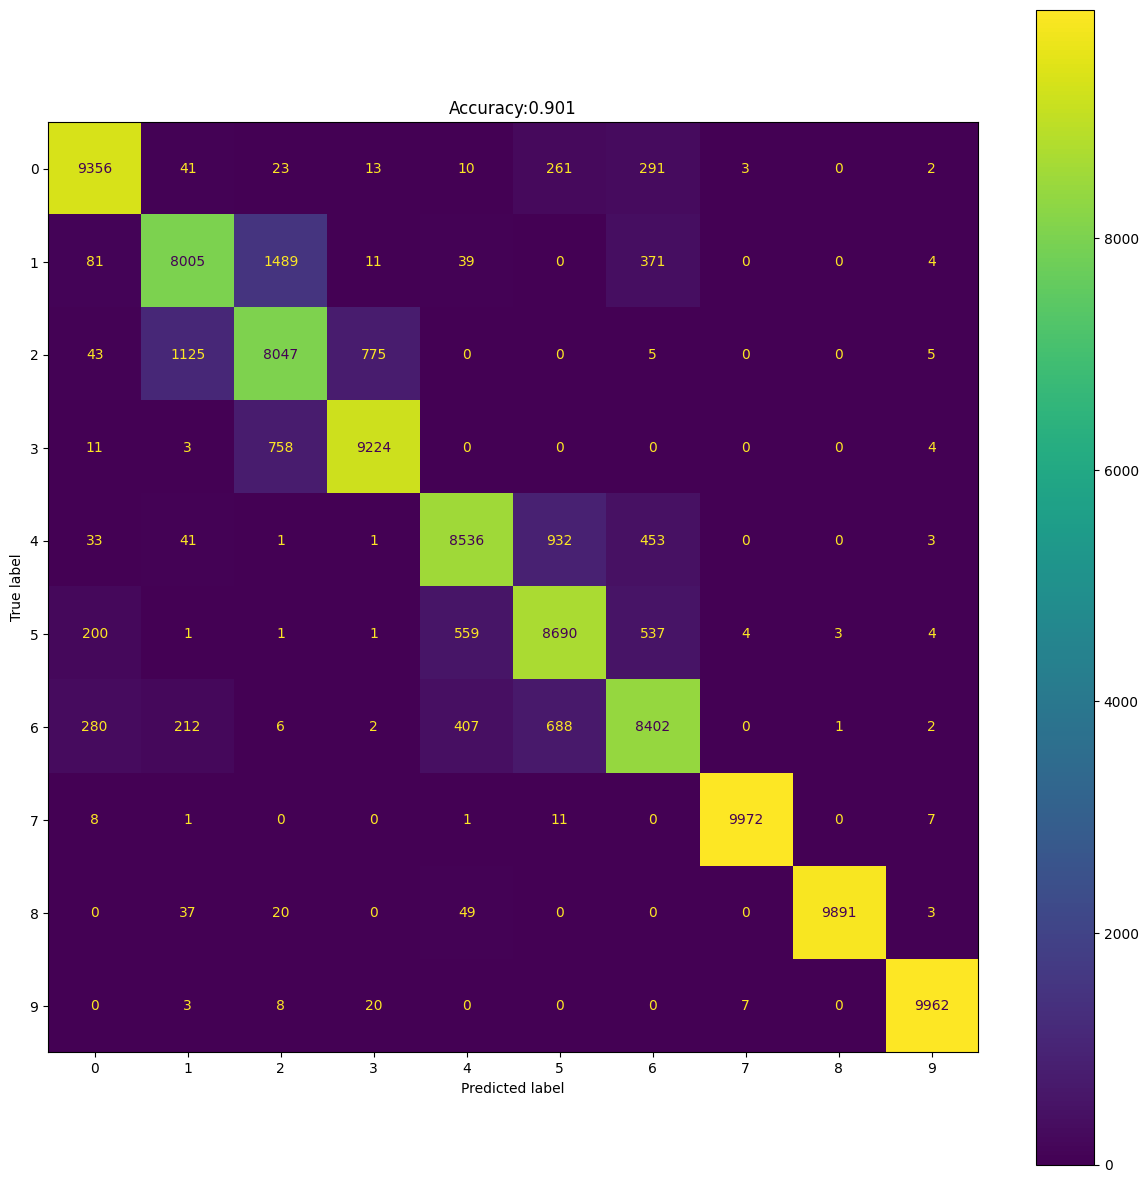

In [63]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III model

In [64]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [65]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 19.6980 - accuracy: 0.0997
test loss, test acc: [19.697954177856445, 0.09967000037431717]


In [66]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[   0    0    1    0    0    1    6    0 9991    1]
 [   0    0    0    0    0    1    6    3 9988    2]
 [   0    0    0    2    0    0    7    1 9989    1]
 [   0    0    0    0    1    2    6    2 9988    1]
 [   0    0    0    0    1    0    7    1 9991    0]
 [   0    0    0    0    0    1    7    2 9988    2]
 [   0    1    0    0    0    0    6    0 9992    1]
 [   0    2    0    0    0    1    9    0 9987    1]
 [   0    0    0    3    1    1   12   22 9958    3]
 [   0    0    0    0    0    2   20   21 9956    1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.33      0.00      0.00     10000
           5       0.11      0.00      0.00     10000
           6       0.07      0.0

Test Accuracy:0.09967


Text(0.5, 1.0, 'Accuracy:0.100')

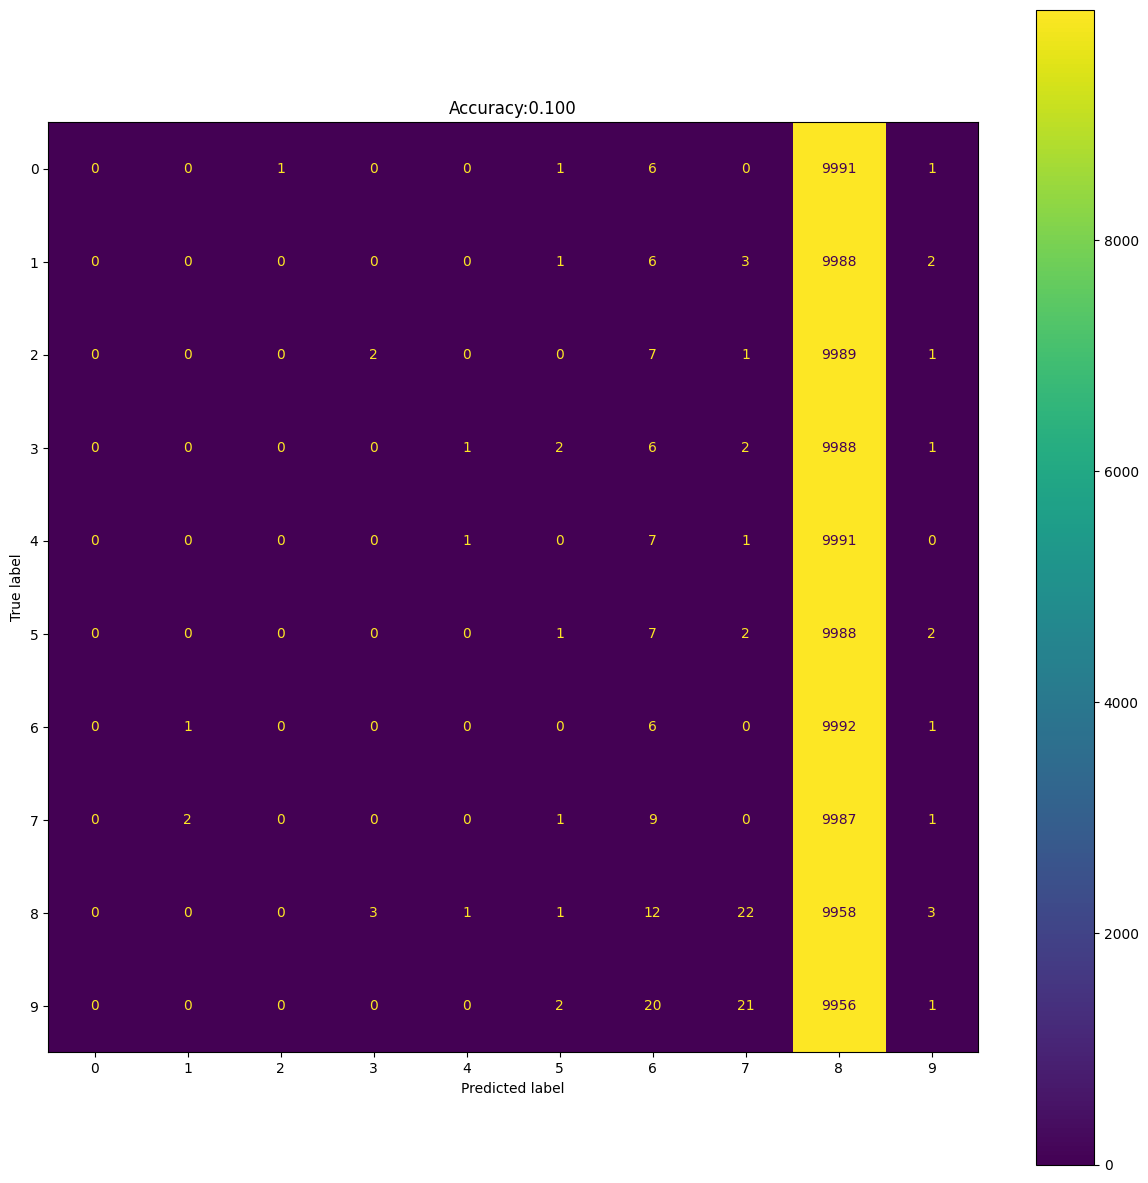

In [67]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [68]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [69]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.5179 - accuracy: 0.1377
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.9781 - accuracy: 0.2960
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.7672 - accuracy: 0.3749
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.6297 - accuracy: 0.4886
Epoch 5/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.5327 - accuracy: 0.5571
Epoch 6/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.4579 - accuracy: 0.6005
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.3986 - accuracy: 0.6231
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.3488 - accuracy: 0.6382
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.3053 - accuracy: 0.6498
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

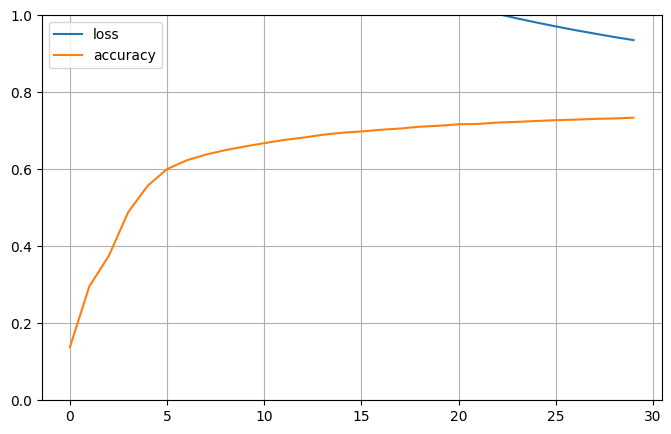

In [70]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [71]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.9280 - accuracy: 0.7418
test loss, test acc: [0.9279711842536926, 0.7417700290679932]


In [72]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[6160  310 1013  352  573  643  739  210    0    0]
 [ 181 5930 1745   14  639  467  988   35    0    1]
 [ 384 2041 6354  405  199   41  542   32    0    2]
 [ 189    7  312 9460   13    0   14    3    0    2]
 [ 146 1111  160    6 5696 1843 1027    9    0    2]
 [ 205  697   56    7 1512 5941 1479  102    0    1]
 [ 425 1153  511   14 1248 1594 5018   36    0    1]
 [  53    5    4    9    0   34    2 9886    3    4]
 [   0   78   31   11    0    1    0    0 9854   25]
 [   0    0   89   27    4    1    0    1    0 9878]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.69     10000
           1       0.52      0.59      0.56     10000
           2       0.62      0.64      0.63     10000
           3       0.92      0.95      0.93     10000
           4       0.58      0.57      0.57     10000
           5       0.56      0.59      0.58     10000
           6       0.51      0.5

Test Accuracy:0.74177


Text(0.5, 1.0, 'Accuracy:0.742')

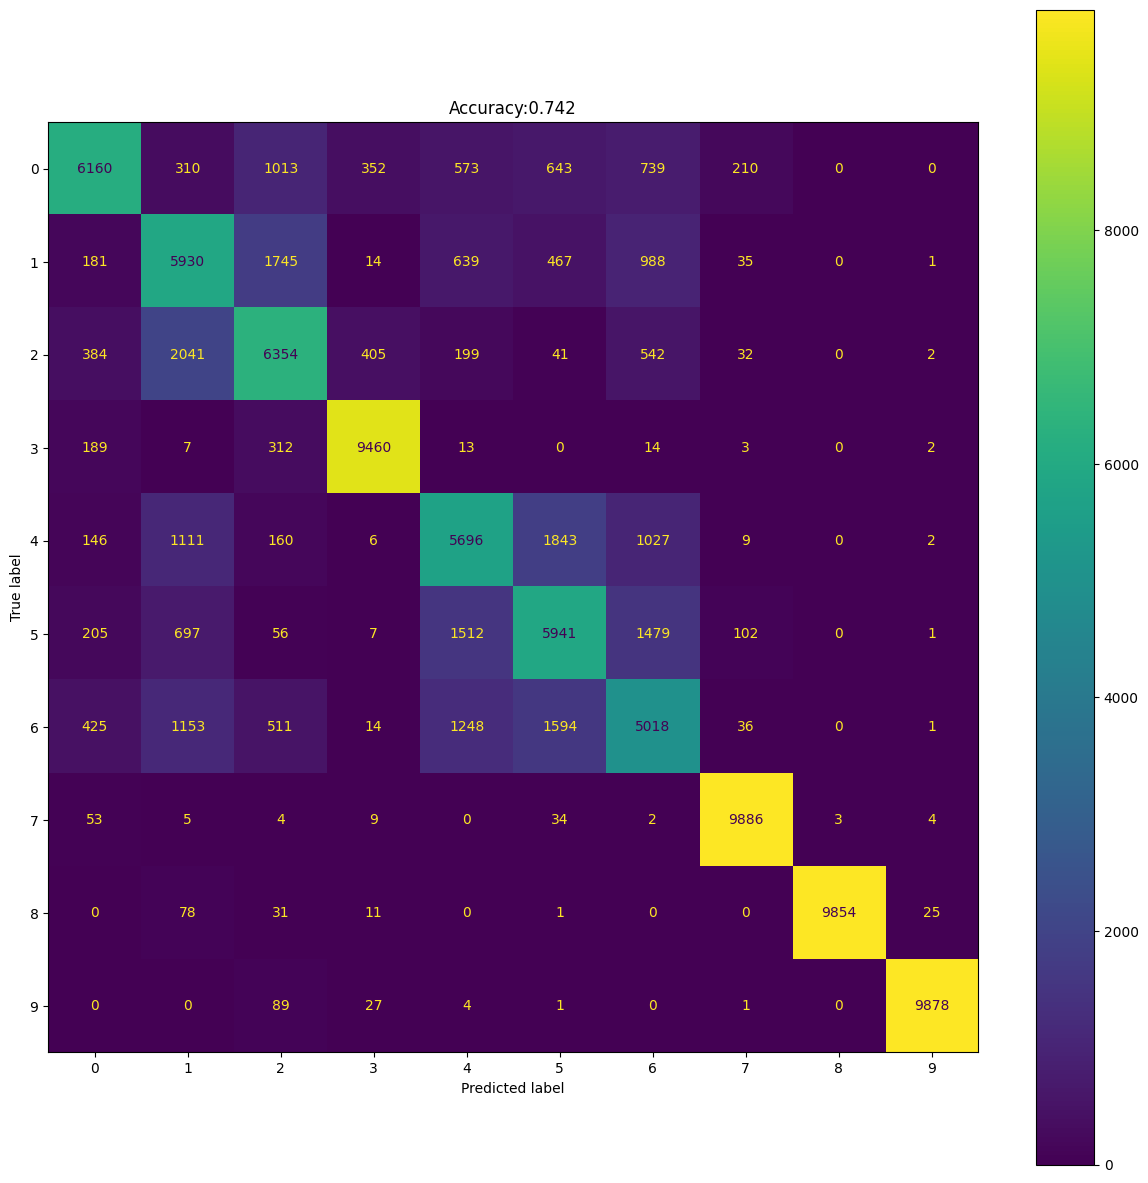

In [73]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')